In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_2018 = pd.read_sas('gss2018.sas7bdat')
df_2022 = pd.read_sas('gss2022.sas7bdat')
# print("2018:\n", df_2018.head(10))
# print("2022:\n", df_2022.head(10))

In [25]:
# create smaller dataframe with only the stuff we need

vars = ['HAPPY'] # idk which variables we are using, but we can list them in here

df_2018 = df_2018[vars]
df_2022 = df_2022[vars]

In [26]:
# Clean Data * NOTE: i have not done anything with null vals, just checked if they exist*
## RENAME COLUMNS:
df_2018 = df_2018.rename(columns={'HAPPY': 'HAPPY_2018'})
df_2022 = df_2022.rename(columns={'HAPPY': 'HAPPY_2022'})

## TO NUMERIC:
df_2018['HAPPY_2018'] = pd.to_numeric(df_2018['HAPPY_2018'], errors='coerce')
df_2022['HAPPY_2022'] = pd.to_numeric(df_2022['HAPPY_2022'], errors='coerce')

## NULL VALUES:
null_2018 = df_2018.isnull().sum()
null_2022 = df_2022.isnull().sum()

print("\nnull count 2018: ", null_2018, "\nnull count 2022: ", null_2022)
# 2018 data has 4 null values, 2022 data has 24 null values

## OUTLIERS:
print("2018 values: \n", df_2018.value_counts())
print("2022 values: \n", df_2022.value_counts())
# no outlier values


null count 2018:  HAPPY_2018    4
dtype: int64 
null count 2022:  HAPPY_2022    24
dtype: int64
2018 values: 
 HAPPY_2018
2.0           1307
1.0            701
3.0            336
dtype: int64
2022 values: 
 HAPPY_2022
2.0           1942
3.0            799
1.0            779
dtype: int64


In [27]:
#merge the data into one data frame
df = df_2018.merge(df_2022, left_index=True, right_index=True)

print("2018 values: \n", df['HAPPY_2018'].value_counts())
print("2022 values: \n", df['HAPPY_2022'].value_counts())

2018 values: 
 2.0    1307
1.0     701
3.0     336
Name: HAPPY_2018, dtype: int64
2022 values: 
 2.0    1291
3.0     530
1.0     510
Name: HAPPY_2022, dtype: int64


In [28]:
print(df.describe())
print(df.value_counts())

        HAPPY_2018   HAPPY_2022
count  2344.000000  2331.000000
mean      1.844283     2.008580
std       0.646790     0.668041
min       1.000000     1.000000
25%       1.000000     2.000000
50%       2.000000     2.000000
75%       2.000000     2.000000
max       3.000000     3.000000
HAPPY_2018  HAPPY_2022
2.0         2.0           730
1.0         2.0           381
2.0         3.0           290
            1.0           279
3.0         2.0           178
1.0         3.0           158
            1.0           157
3.0         3.0            80
            1.0            74
dtype: int64


In [29]:
#change data frames so they contain happiness rating and year it was recorded
df18 = df_2018.rename(columns={'HAPPY_2018': 'HAPPY'})
df22 = df_2022.rename(columns={'HAPPY_2022': 'HAPPY'})

df18['YEAR'] = 2018
df22['YEAR'] = 2022

print(df18.head())
print(df22.head())

   HAPPY  YEAR
0    2.0  2018
1    1.0  2018
2    1.0  2018
3    1.0  2018
4    2.0  2018
   HAPPY  YEAR
0    3.0  2022
1    3.0  2022
2    3.0  2022
3    3.0  2022
4    2.0  2022


In [60]:
#merge previous data frames together
df_merged = pd.concat([df18, df22], ignore_index=True)

# print(df_merged.head(), '\n')
# print(df_merged['HAPPY'].unique(), '\n')
# print(df_merged['YEAR'].unique(), '\n')

Text(0, 0.5, 'Frequency')

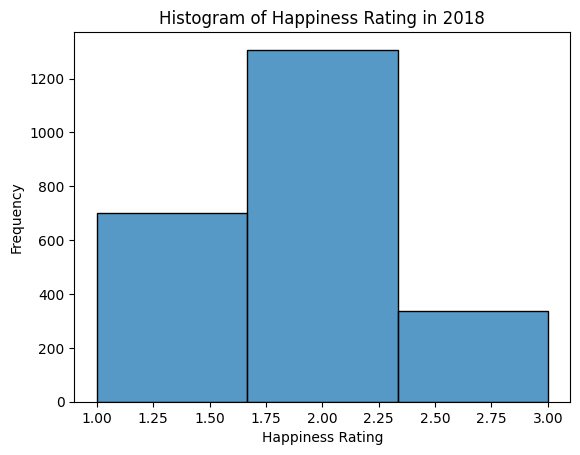

In [31]:
# idk if this is the chart types we wanted to use, i just went with two histograms based on the values we have, but maybe a stacked barplot would also work
sns.histplot(data=df, x="HAPPY_2018", bins=3)
plt.title("Histogram of Happiness Rating in 2018") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

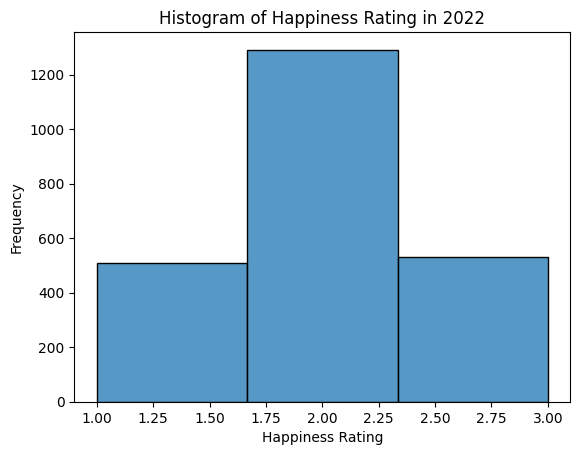

In [32]:
sns.histplot(data=df, x="HAPPY_2022", bins=3)
plt.title("Histogram of Happiness Rating in 2022") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Frequency")

In [ ]:
# merge dataframes from both df_mods

<Axes: ylabel='Density'>

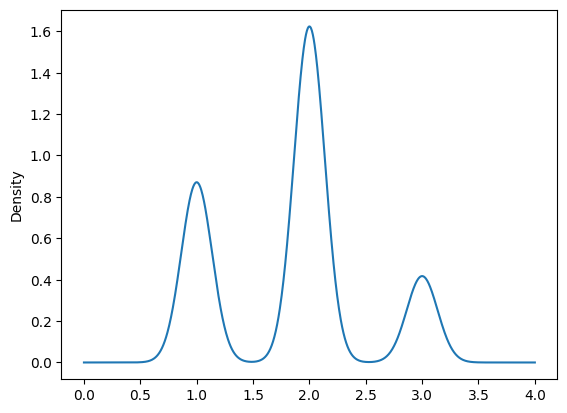

In [33]:
# kernel density for 2018

df['HAPPY_2018'].plot.density()

<Axes: ylabel='Density'>

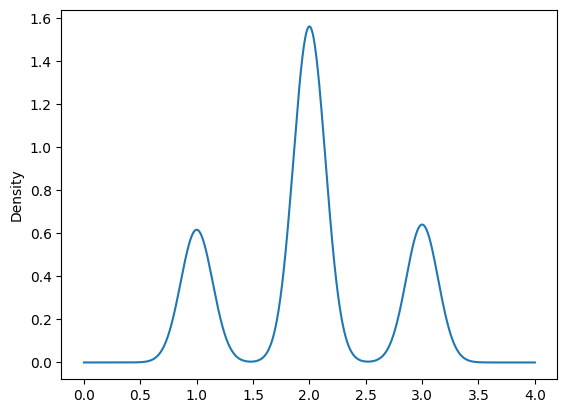

In [34]:
#and 2022

df['HAPPY_2022'].plot.density()

#will do the grouped ones when we merge the dataset

<Axes: ylabel='Density'>

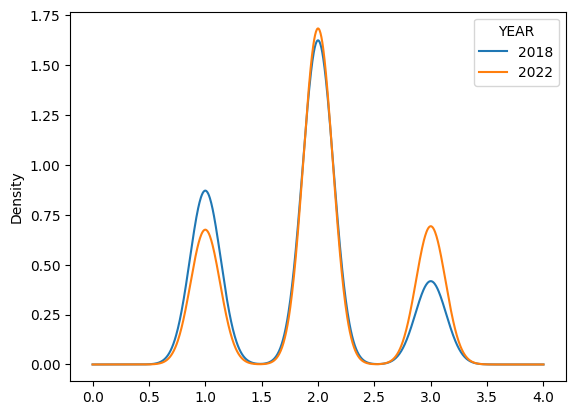

In [35]:
#grouped kernel,  grouped by year
group_by = 'YEAR'
var = 'HAPPY'
df_wide = df_merged.pivot(columns=group_by,values=var)
df_wide.plot.density()

In [46]:
# computing average happiness score because mean will be resistant to the different size of the data set
# using df18 and df22

mean18 = np.mean(df18['HAPPY'])
print(mean18, '\n')
mean22 = np.mean(df22['HAPPY'])
print(mean22, '\n')

delta_happy = mean22 - mean18
print('happiness change: ' + str(delta_happy))

# remember that according to this measure, higher numbers mean less happy

1.844283276450512 

2.0056818181818183 

happiness change: 0.1613985417313064


In [47]:
# calculating delta of respondents that chose not to answer
null18 = df18['HAPPY'].isnull().sum()
null22 = df22['HAPPY'].isnull().sum()
count18 = df18['HAPPY'].count()
count22 = df22['HAPPY'].count()

print('null percentage (2018): ' + str(null18 / count18))
print('null percentage (2022): ' + str(null22 / count22))

null percentage (2018): 0.0017064846416382253
null percentage (2022): 0.006818181818181818


In [ ]:
# while this doesn't seem statistically significant (0.1% versus 0.7%), it might be worth highlighting

In [61]:
# change variables to categorical for cleaner visualizations
# using merged dataset

df_merged['HAPPY'] = df_merged['HAPPY'].replace(1.0,'Very Happy')
df_merged['HAPPY'] = df_merged['HAPPY'].replace(2.0,'Pretty Happy')
df_merged['HAPPY'] = df_merged['HAPPY'].replace(3.0,'Not Too Happy')
df_merged.head()

,HAPPY,YEAR
0,Pretty Happy,2018
1,Very Happy,2018
2,Very Happy,2018
3,Very Happy,2018
4,Pretty Happy,2018


Text(0, 0.5, 'Total Responses')

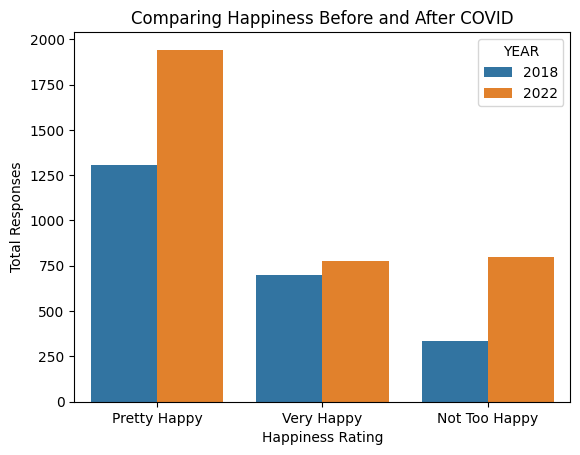

In [62]:
# plot of merged happiness side by side
sns.countplot(data=df_merged, x='HAPPY', hue='YEAR')
plt.title("Comparing Happiness Before and After COVID") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Total Responses")

In [63]:
# gonna make some pie charts just for fun
print(df18.value_counts(), '\n')
print(df22.value_counts(), '\n')

HAPPY  YEAR
2.0    2018    1307
1.0    2018     701
3.0    2018     336
dtype: int64 

HAPPY  YEAR
2.0    2022    1942
3.0    2022     799
1.0    2022     779
dtype: int64 



In [64]:
data18 = [1307, 701, 336, null18]
data22 = [1942, 779, 799, null22]
labels = ['Pretty Happy', 'Very Happy', 'Not Too Happy', "Didn't Respond"]

Text(0.5, 1.0, 'Happiness in the U.S., 2018')

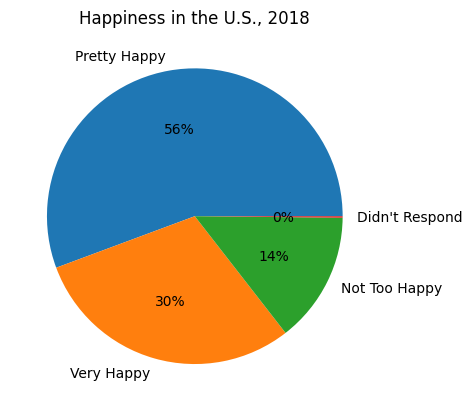

In [65]:
# 2018 pie chart

plt.pie(data18, labels=labels, autopct='%.0f%%')
plt.title('Happiness in the U.S., 2018')

Text(0.5, 1.0, 'Happiness in the U.S., 2022')

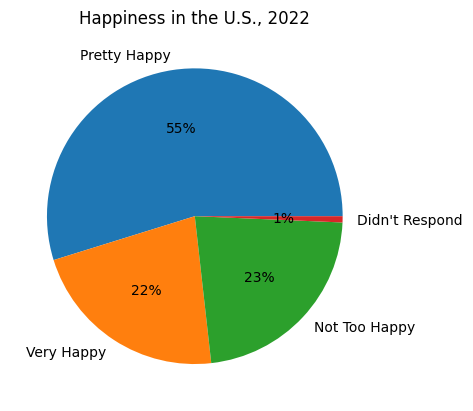

In [66]:
# 2022 pie chart

plt.pie(data22, labels=labels, autopct='%.0f%%')
plt.title('Happiness in the U.S., 2022')